<a href="https://colab.research.google.com/github/skfo763/Google-ML-Bootcamp/blob/main/phase2/course1/week3/Exercise_3_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 3
In the videos you looked at how you would improve Fashion MNIST using Convolutions. For your exercise see if you can improve MNIST to 99.8% accuracy or more using only a single convolutional layer and a single MaxPooling 2D. You should stop training once the accuracy goes above this amount. It should happen in less than 20 epochs, so it's ok to hard code the number of epochs for training, but your training must end once it hits the above metric. If it doesn't, then you'll need to redesign your layers.

I've started the code for you -- you need to finish it!

When 99.8% accuracy has been hit, you should print out the string "Reached 99.8% accuracy so cancelling training!"

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [2]:
class AccuracyCallback(tf.keras.callbacks.Callback):
  def on_epocn_end(self, epoch, logs={}):
    if(logs.get('acc') > 0.998):
      print("\n정확도가 99.8%를 넘겼으므로 학습을 중단합니다.")
      self.model.stop_training = True

In [7]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [9]:
train_x = train_x / 255.0
test_x = test_x / 255.0

train_x_img = train_x.reshape(60000, 28, 28, 1)
test_x_img = test_x.reshape(10000, 28, 28, 1)

In [10]:
callback = AccuracyCallback()

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(train_x_img, train_y, epochs=10, callbacks=[callback], verbose=1)
test_loss, test_accuracy = model.evaluate(test_x_img, test_y)
print(test_accuracy)

Epoch 1/10
1875/1875 [==============================] - 53s 28ms/step - loss: 1.3236 - accuracy: 0.5878
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.3498 - accuracy: 0.8983
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2996 - accuracy: 0.9113
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2649 - accuracy: 0.9216
Epoch 5/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2194 - accuracy: 0.9348
Epoch 6/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1910 - accuracy: 0.9447
Epoch 7/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1673 - accuracy: 0.9497
Epoch 8/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1502 - accuracy: 0.9565
Epoch 9/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1382 - accuracy: 0.9585
Epoch 10/10
313/313 [==============================] - 3s 9ms/st

8


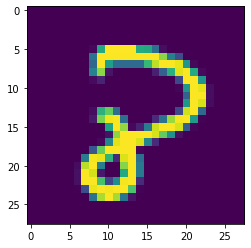

In [17]:
import matplotlib.pyplot as plt
import numpy as np
random_index = np.random.randint(0, len(test_x))

plt.imshow(train_x[random_index])
print(train_y[random_index])